In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [23]:
X = pd.read_csv('reduced_df.csv') 

  
# Dropping the CUST_ID column from the data 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 
  
print(X.head()) 

   Unnamed: 0  BALANCE_FREQUENCY  ONEOFF_PURCHASES  ...  installment  none  one_off
0           0           0.597837          0.000000  ...            1     0        0
1           1           0.646627          0.000000  ...            0     1        0
2           2           0.693147          6.651791  ...            0     0        1
3           3           0.492477          7.313220  ...            0     0        1
4           4           0.693147          2.833213  ...            0     0        1

[5 rows x 18 columns]


In [0]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized)

In [25]:
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3','P4','P5'] 
print(X_principal.head()) 

         P1        P2        P3        P4        P5
0  0.056811  0.615722  0.279367 -0.009008  0.259617
1  0.873206 -0.034449 -0.184796  0.268683  0.135682
2 -0.192561 -0.508472  0.506714 -0.379634  0.131159
3  0.314447 -0.366759  0.527698 -0.265992  0.032511
4  0.418327 -0.159671  0.557747 -0.297372  0.373932


In [0]:
km_4=KMeans(n_clusters=2,random_state=123)

In [0]:
km_4.fit(X_principal)
labels=km_4.labels_

In [0]:
df_stage_1=pd.DataFrame(X_principal)
df_stage_1['Cluster']=labels

In [29]:
df_stage_1.head

<bound method NDFrame.head of             P1        P2        P3        P4        P5  Cluster
0     0.056811  0.615722  0.279367 -0.009008  0.259617        0
1     0.873206 -0.034449 -0.184796  0.268683  0.135682        1
2    -0.192561 -0.508472  0.506714 -0.379634  0.131159        0
3     0.314447 -0.366759  0.527698 -0.265992  0.032511        1
4     0.418327 -0.159671  0.557747 -0.297372  0.373932        1
...        ...       ...       ...       ...       ...      ...
8945 -0.448445  0.725984  0.020431 -0.050491 -0.242283        0
8946 -0.408534  0.741187 -0.018148 -0.214093 -0.110101        0
8947 -0.316981  0.806950  0.078341 -0.151442 -0.128082        0
8948  0.758393  0.268883  0.122112  0.310031  0.061995        1
8949  0.034079 -0.508083  0.294610 -0.355161 -0.505743        1

[8950 rows x 6 columns]>

In [30]:
df_stage2_1=df_stage_1[df_stage_1['Cluster']==0]
print(df_stage2_1)
df_stage2_2=df_stage_1[df_stage_1['Cluster']==1]
print(df_stage2_2)

            P1        P2        P3        P4        P5  Cluster
0     0.056811  0.615722  0.279367 -0.009008  0.259617        0
2    -0.192561 -0.508472  0.506714 -0.379634  0.131159        0
5    -0.286107  0.456144 -0.209152 -0.475004  0.372576        0
6    -0.776047 -0.383390  0.026666  0.268666  0.001267        0
7    -0.382824  0.509098 -0.229000 -0.404606  0.298655        0
...        ...       ...       ...       ...       ...      ...
8941  0.207716  0.229941 -0.670421 -0.263530 -0.584108        0
8942 -0.354307  0.764363 -0.001367 -0.205657 -0.096329        0
8945 -0.448445  0.725984  0.020431 -0.050491 -0.242283        0
8946 -0.408534  0.741187 -0.018148 -0.214093 -0.110101        0
8947 -0.316981  0.806950  0.078341 -0.151442 -0.128082        0

[5110 rows x 6 columns]
            P1        P2        P3        P4        P5  Cluster
1     0.873206 -0.034449 -0.184796  0.268683  0.135682        1
3     0.314447 -0.366759  0.527698 -0.265992  0.032511        1
4     0.418327 

In [31]:
df_stage2_1.drop(["Cluster"], axis = 1, inplace = True)
df_stage2_1.head
df_stage2_2.drop(["Cluster"], axis = 1, inplace = True)
df_stage2_2.head

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<bound method NDFrame.head of             P1        P2        P3        P4        P5
1     0.873206 -0.034449 -0.184796  0.268683  0.135682
3     0.314447 -0.366759  0.527698 -0.265992  0.032511
4     0.418327 -0.159671  0.557747 -0.297372  0.373932
9     0.013413 -0.277149  0.818698  0.102647 -0.103155
11   -0.010236 -0.430663  0.737541 -0.219395  0.089804
...        ...       ...       ...       ...       ...
8939  0.321459 -0.481926  0.256793 -0.545522 -0.257044
8943  0.293414  0.073555  0.798387 -0.022352 -0.148204
8944  0.027337 -0.213555  0.697418 -0.320000 -0.087913
8948  0.758393  0.268883  0.122112  0.310031  0.061995
8949  0.034079 -0.508083  0.294610 -0.355161 -0.505743

[3840 rows x 5 columns]>

In [32]:
km_4.fit(df_stage2_1)
labels_stage2_1=km_4.labels_
km_4.fit(df_stage2_2)
labels_stage2_2=km_4.labels_
labels_stage2_2


array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [33]:
labels_stage2_2[labels_stage2_2 == 0] = 2
labels_stage2_2[labels_stage2_2 == 1] = 3
labels_stage2_2

array([2, 3, 3, ..., 3, 2, 3], dtype=int32)

In [34]:
df_stage2_1['Cluster']=labels_stage2_1
df_stage2_2['Cluster']=labels_stage2_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df_final=df_stage2_1.append(df_stage2_2, ignore_index = True) 


In [36]:
print(set(df_final['Cluster']))

{0, 1, 2, 3}


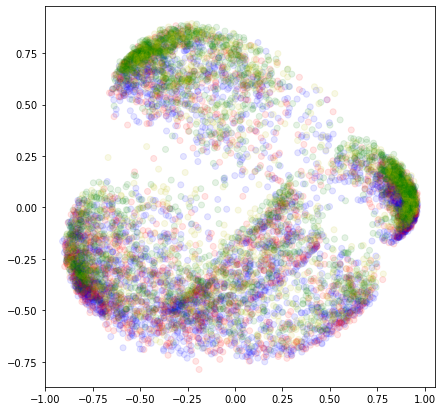

In [37]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'purple'}
label_color=[color_map[l] for l in df_final['Cluster']]
plt.figure(figsize=(7,7))
plt.scatter(x='P1',y='P2',c=label_color,cmap='Spectral',alpha=0.1,data=X_principal)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


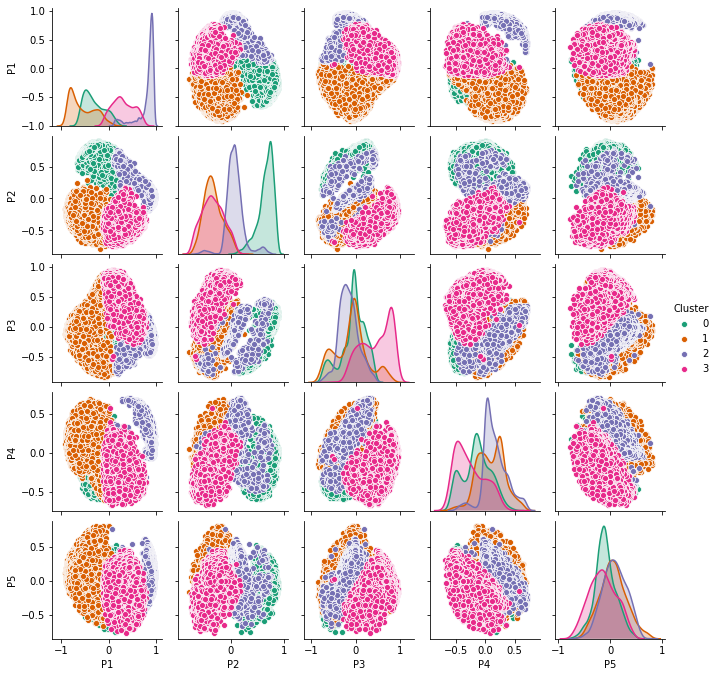

In [38]:
import seaborn as sns
sns.pairplot(df_final,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [39]:
from sklearn import metrics
from sklearn.metrics import calinski_harabaz_score,silhouette_score
labels=np.array(df_final['Cluster'])
best_sil_score=silhouette_score(X_principal,labels)
best_cal_score=calinski_harabaz_score(X_principal,labels)
print('Silhouette Score is {}'.format(best_sil_score))
print('Calinski_harabaz Score is {}'.format(best_cal_score))

Silhouette Score is -0.018574357662546295
Calinski_harabaz Score is 51.09566155312379


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [40]:
labels

array([0, 1, 0, ..., 3, 2, 3], dtype=int32)

In [0]:
credit=pd.read_csv('credit.csv')
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]] 
cr_pre.describe()
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(labels,name='Cluster')],axis=1)

In [42]:
cluster_4=cluster_df_4.groupby('Cluster')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster,0,1,2,3
PURCHASES_TRX,16.175000,17.148515,12.205443,11.680538
Monthly_avg_purchase,96.964605,106.221951,63.997618,65.263978
Monthly_cash_advance,95.332782,99.895318,76.589644,77.405087
limit_usage,0.398918,0.407964,0.365777,0.372208
CASH_ADVANCE_TRX,3.136538,3.455776,3.133450,3.165173
payment_minpay,9.497336,7.408822,12.692381,6.378414
both_oneoff_installment,0.344231,0.364026,0.245830,0.252881
installment,0.186538,0.194389,0.330553,0.339309
one_off,0.235096,0.224752,0.181738,0.185659
none,0.234135,0.216832,0.241879,0.222151


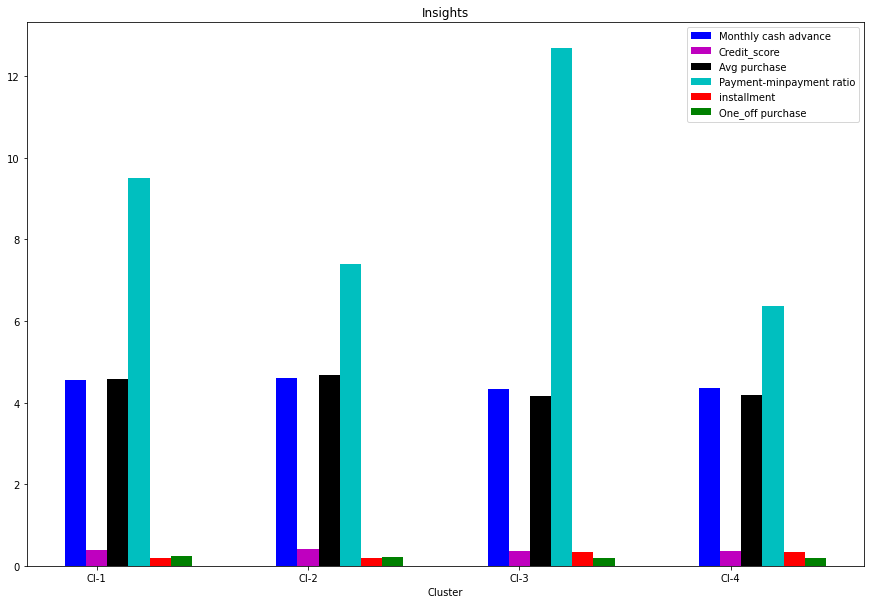

In [43]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-1', 'Cl-2', 'Cl-3', 'Cl-4'))
plt.legend()